## Tema: Arbol de desiciones 
## Presentado a: Dr. Breyner Parra 
## Materia: Analisis de Datos 
## Estudiante: Juan Carlos Pulido Sierra

In [36]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [37]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("./Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [40]:
data.shape

(891, 12)

In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

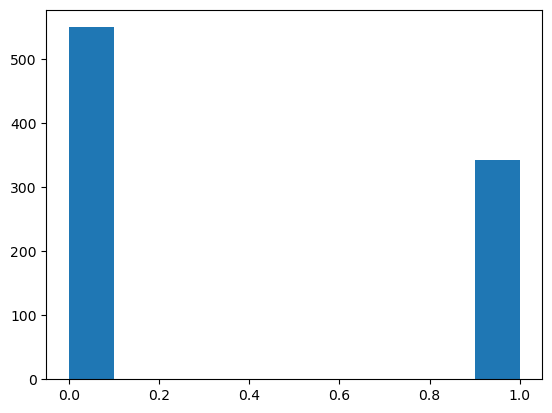

In [43]:
plt.hist(data.Survived)

<Axes: xlabel='Pclass', ylabel='Age'>

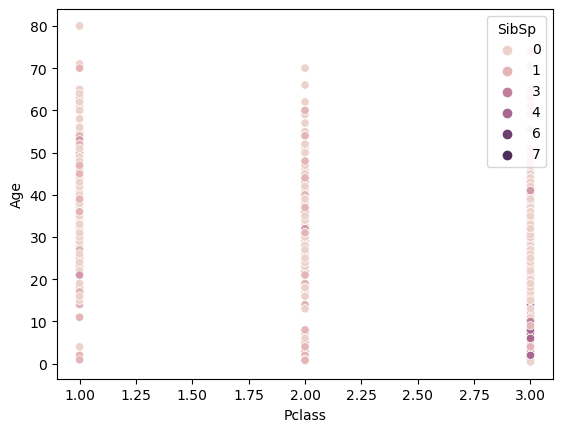

In [44]:
sns.scatterplot(x = "Embarked", y = "Cabin", hue = "SibSp", data = data)

In [69]:
predictors_col = ["Pclass", "Age", "Fare"]
target_col = ['Survived']

In [70]:
predictors = data[predictors_col]
target = data[target_col]

In [71]:
predictors

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,0.0,23.4500
889,1,26.0,30.0000


In [72]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [73]:
corr = predictors.corr()
corr

,Pclass,Age,Fare
Pclass,1.000000,-0.361353,-0.549500
Age,-0.361353,1.000000,0.135516
Fare,-0.549500,0.135516,1.000000


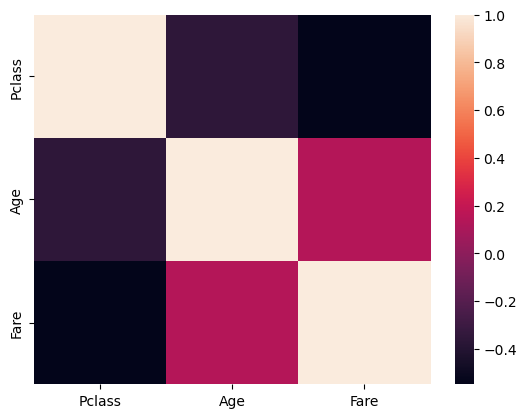

In [74]:
sns.heatmap(corr)
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [76]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [77]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [79]:
data.fillna(0, inplace=True)

In [80]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [82]:
Tree = DecisionTreeClassifier()

In [83]:
arbol = tree.fit(X_train, y_train)

[Text(0.5675406678082192, 0.975, 'x[0] <= 2.5\ngini = 0.477\nsamples = 668\nvalue = [405, 263]'),
 Text(0.22174657534246575, 0.925, 'x[2] <= 13.679\ngini = 0.496\nsamples = 311\nvalue = [141, 170]'),
 Text(0.030821917808219176, 0.875, 'x[2] <= 7.75\ngini = 0.423\nsamples = 69\nvalue = [48, 21]'),
 Text(0.025342465753424658, 0.825, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.036301369863013695, 0.825, 'x[1] <= 17.5\ngini = 0.458\nsamples = 59\nvalue = [38, 21]'),
 Text(0.01643835616438356, 0.775, 'x[2] <= 11.25\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.010958904109589041, 0.725, 'x[1] <= 16.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.005479452054794521, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01643835616438356, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.021917808219178082, 0.725, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.056164383561643834, 0.775, 'x[1] <= 27.5\ngini = 0.431\nsamples = 54\nvalue = [37, 17]'),
 T

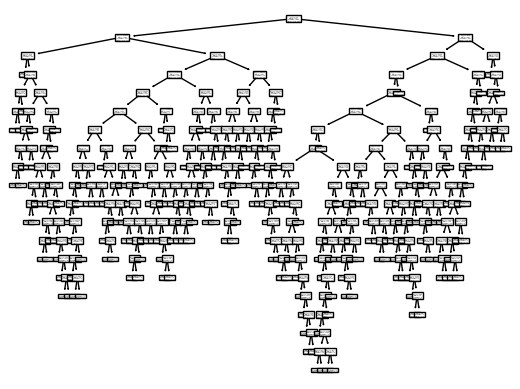

In [84]:
plot_tree(arbol)

In [85]:
predicciones = arbol.predict(X_test)

In [86]:
predicciones

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [87]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,102,42
1,35,44


In [88]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6547085201793722

## Analisis de resultados

### Se evaluó el modelo de clasificación utilizando una matriz de confusión y se calculó la precisión del modelo. La matriz de confusión muestra que de un total de 223 muestras, 102 fueron clasificadas correctamente como "0", 44 fueron clasificadas correctamente como "1", 42 fueron clasificadas incorrectamente como "1" cuando en realidad eran "0", y 35 fueron clasificadas incorrectamente como "0" cuando en realidad eran "1". La precisión del modelo fue del 65.47%, lo que significa que alrededor del 65.47% de las predicciones realizadas por el modelo fueron correctas en relación con las etiquetas verdaderas.